# Iris Dataset Overview

## Introduction

The Iris dataset is one of the most famous datasets in machine learning and statistics. It was introduced by British statistician and biologist Ronald Fisher in 1936 and has become a standard benchmark for classification algorithms.

## Dataset Description

The dataset contains **150 samples** of iris flowers, with **50 samples** from each of three species:

- **Iris Setosa**
- **Iris Versicolor**
- **Iris Virginica**

## Features

Each sample includes four measurements (in centimeters):

1. **Sepal Length** - Length of the sepal
2. **Sepal Width** - Width of the sepal
3. **Petal Length** - Length of the petal
4. **Petal Width** - Width of the petal

All features are continuous numerical values that help distinguish between the three iris species.

## Characteristics

- **Size**: 150 samples, 4 features, 3 classes
- **Balanced**: Each class has exactly 50 samples
- **Clean**: No missing values
- **Separability**: Setosa is linearly separable from the other two species, while Versicolor and Virginica have some overlap

## Common Use Cases

The Iris dataset is widely used for:

- **Classification** - Training and testing classification algorithms
- **Data Visualization** - Creating scatter plots and other visualizations
- **Educational Purposes** - Teaching machine learning concepts
- **Algorithm Benchmarking** - Comparing performance of different models

## Why It's Popular

1. **Small and Simple** - Easy to understand and quick to process
2. **Well-Structured** - Clean data with no preprocessing needed
3. **Interesting Patterns** - Clear relationships between features and classes
4. **Historical Significance** - One of the earliest datasets in pattern recognition

## Typical Results

Most machine learning algorithms achieve **95-100% accuracy** on this dataset, making it an excellent starting point for learning classification techniques.

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [116]:
def get_accuracy(X_train,X_test,y_train,y_test,model):
    return {'test Accuracy' : accuracy_score(y_test,model.predict(X_test)),'train Accuracy' : accuracy_score(y_train,model.predict(X_train))}

In [117]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [119]:
df = df.drop(['Id'],axis=1)

In [120]:
X = df.drop('Species',axis = 1)
y = df['Species']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)
max_feature = X.shape[1]
forest = RandomForestClassifier(max_features=max_feature,n_estimators=20,random_state=42)
forest.fit(X_train,y_train)

,n_estimators,20
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [121]:
print(get_accuracy(X_train, X_test, y_train, y_test, forest))

{'test Accuracy': 0.9866666666666667, 'train Accuracy': 1.0}


In [ ]:
param_grid = {'C':[0.01,0.1,1,10],
              'l1_ratio' : [0.1,0.5,0.9]}
grid = GridSearchCV(LogisticRegression(penalty='elasticnet', solver='saga', random_state=42),
                    param_grid,cv=5)
grid.fit(X_train,y_train)


In [123]:
print("Best params:", grid.best_params_)
model = grid.best_estimator_

Best params: {'C': 1, 'l1_ratio': 0.1}


In [ ]:
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    C=1,
    l1_ratio=0.1,
    n_jobs=-1,
    random_state=42
)
model.fit(X_train, y_train)

print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 1.0, 'train Accuracy': 0.9733333333333334}


c:\Projects\Iris\Iris\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [125]:
y_pred = model.predict(X_test)

print('Classification report :\n', classification_report(y_test,y_pred))
print('Confusion matrix :\n', confusion_matrix(y_test,y_pred))

Classification report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       1.00      1.00      1.00        23
 Iris-virginica       1.00      1.00      1.00        23

       accuracy                           1.00        75
      macro avg       1.00      1.00      1.00        75
   weighted avg       1.00      1.00      1.00        75

Confusion matrix :
 [[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]


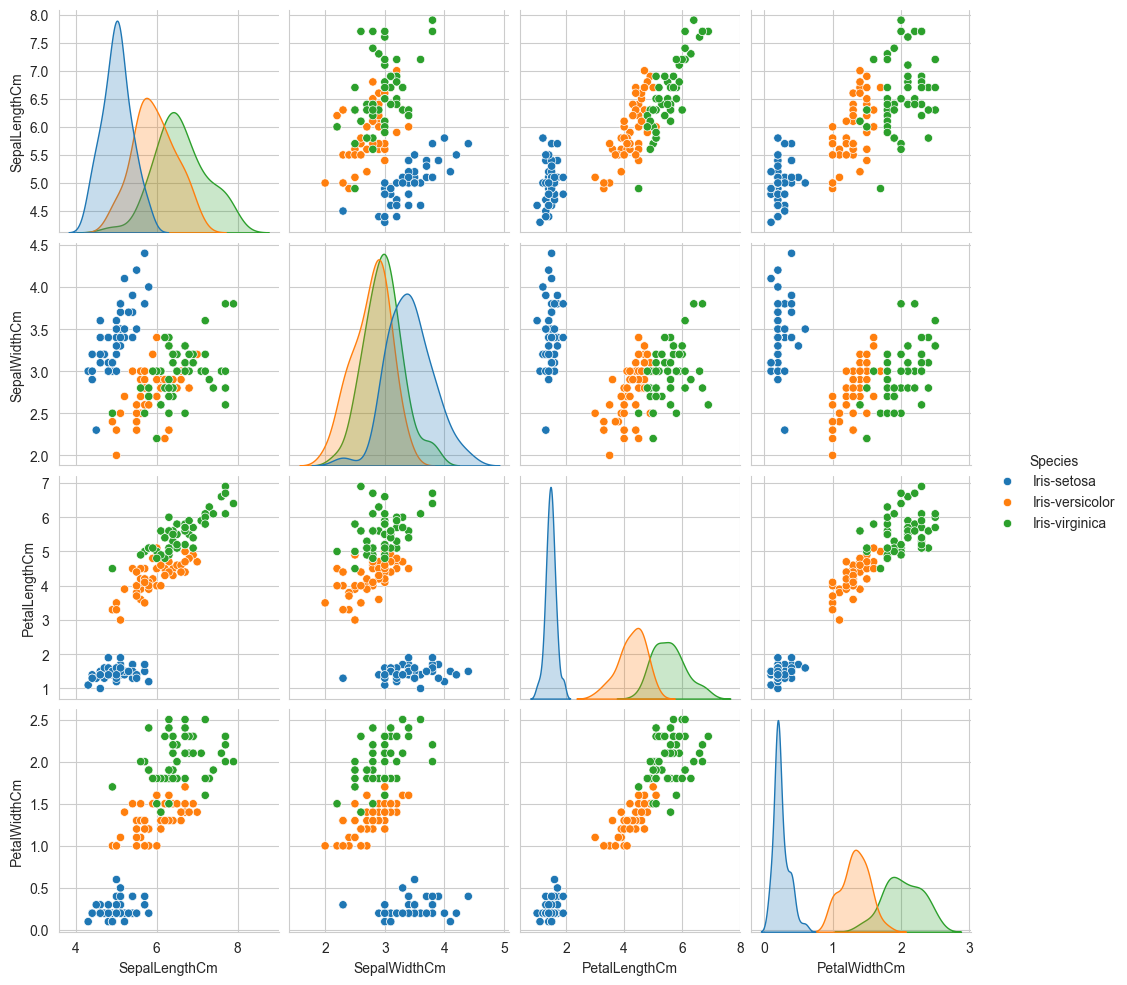

In [126]:
sns.pairplot(df, hue='Species')

Text(0.5, 0, 'Confidence Score')

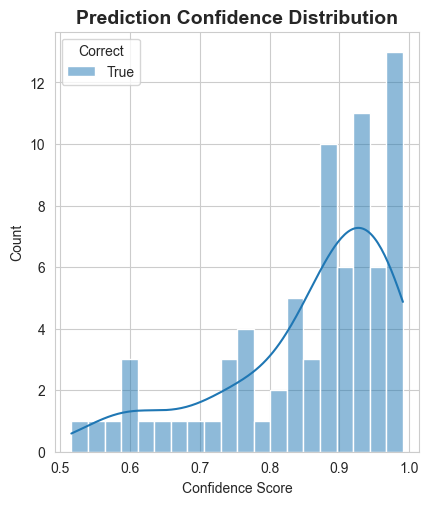

In [127]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

fig = plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 2)
max_proba = np.max(y_pred_proba, axis=1)
correct = y_test == y_pred
sns.histplot(data=pd.DataFrame({'Confidence': max_proba, 'Correct': correct}),
             x='Confidence', hue='Correct', bins=20, kde=True)
plt.title('Prediction Confidence Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Confidence Score')